In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def display(img, dpi=300, axis=False):
    plt.figure(dpi=dpi)
    plt.imshow(img, cmap='gray')
    plt.axis(axis)
    plt.show()

In [10]:
def cell_detection(cell_id, thresh_low, thresh_high, disp=True, filtered=False):
    img = cv2.imread(f"images/{cell_id}.jpg")
    clean = img.copy()
    if filtered:
        img = cv2.imread(f"images/{cell_id}_filtered.jpg")

    # 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, thresh_low, thresh_high, cv2.THRESH_BINARY)[1]
    contours, _ = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    contours = [c for c in contours if 100 > cv2.contourArea(c) > 10]
    cell_areas = [cv2.contourArea(c) for c in contours]
    total_cell_area = sum(cell_areas)
    #

    image_area = img.shape[0] * img.shape[1]
    cv2.drawContours(image=clean, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=1, lineType=cv2.LINE_AA)
    print(f"cell area: {total_cell_area}, total_area {image_area},  ratio: {total_cell_area/image_area}")

    if disp:
        display(clean, 200)
    
    return cell_areas

In [4]:
completed = []

1br
cell area: 45332.0, total_area 960384,  ratio: 0.04720195255231241


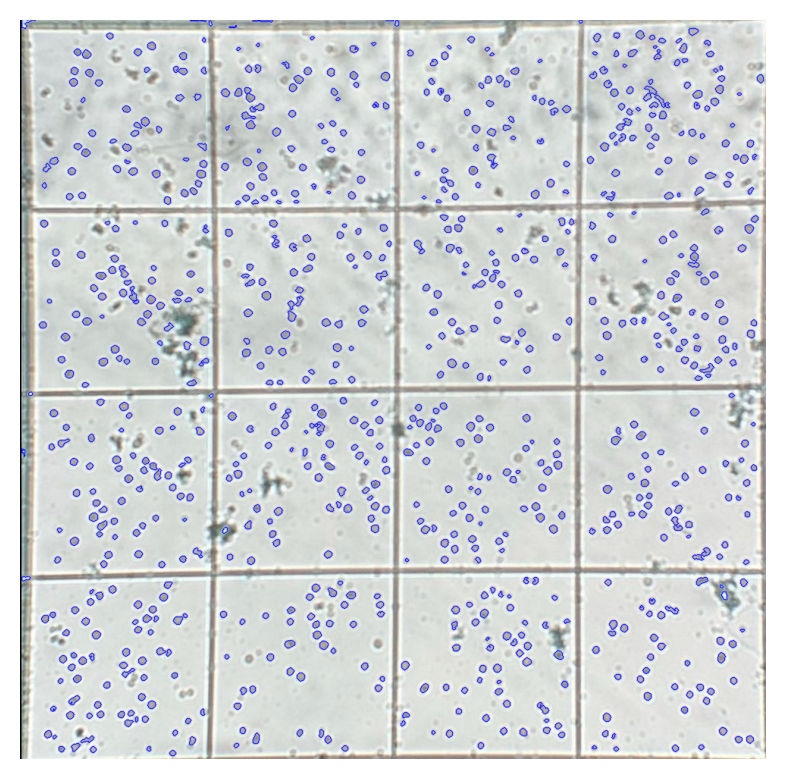

In [12]:
# parameter tweaking for each grid set
for n in list(range(1, 7)):
    for d in ['t', 'b']:
        for c in ['l', 'r']:
            name = f"{n}{d}{c}"
            # if name not in completed:
            if name in ['1br']:
                print(name)
                areas = cell_detection(name, 190, 200, filtered=False)
                if 'y' in input('satisfied?'):
                    completed.append(name)
                    pd.Series(areas).to_csv(f"{name}.csv", index=False)
                break
        else:
            continue
        break
    else:
        continue
    break
